In [677]:
#Práctica Andrés  F. Caballero Giraldo 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor

In [636]:
path = "/home/andres/Escritorio/BOOTCAMPDATA/Machine-Learning/machine-learning/project/airbnb-listings-extract.csv"
house_data = pd.read_csv(path, sep =";") 

In [637]:
#Funcion para ver todas las columnas
pd.options.display.max_columns = None


In [638]:
#Comienzo con un análisis exploratorio. Observo las diferentes variables y a simple vista veo muchas con 
#descripciones y comentarios, asi como Url's que no van a aportar nada al importante al modelo.

house_data.head()


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [639]:
house_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [640]:

house_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [641]:
#Comprobamos si alguna variable posee campos con NA's

house_data.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
                                  ...  
Cancellation Policy               False
Calculated host listings count     True
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

In [642]:
house_data['City'].value_counts()

Madrid            13207
Barcelona           292
London              132
Paris               108
马德里                  52
                  ...  
Son Moll              1
La Habana             1
Mile End / Bow        1
Sint-Gillis           1
Son Vida              1
Name: City, Length: 246, dtype: int64

In [643]:
#He visto que es mejor filtrar los datos por la ciudad de Madrid pues es más del 90% de los datos y lo hago antes
#pues es más sencillo que hacerlo después de codificar las  variables categóricas.

house_data = house_data[house_data['City'] == 'Madrid']

In [644]:
#Tras un análisis exploratorio y viendo la correlación entre el precio y las demás variables y pruebas en el modelo,
#he visto que hay variables que no aportan gran información con relación al precio y las eliminamos.

house_data = house_data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Space', 'Description', 'Neighborhood Overview','Notes','Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Thumbnail Url', 'Medium Url', 'Notes' , 'Square Feet', 'Transit','Access','Interaction','House Rules', 'Street', 'Market','Smart Location','Country Code', 'Features', 'Latitude','Longitude', 'City', 'Country', 'Experiences Offered', 'License','Jurisdiction Names','Cancellation Policy', 'Amenities','Calendar Updated','Calendar last Scraped','First Review','Last Review', 'State', 'Zipcode'] , axis=1)

In [645]:
#Elimino las columnas con mas de 8000 NA, puesto que es alrrededor del 70% de entradas NA's para una variable
#y su información es poco relevante. 

nAn_por_columna = house_data.isnull().sum()
nAn_por_columna = nAn_por_columna[nAn_por_columna < 8000]
house_data =house_data[list(nAn_por_columna.keys())]

In [646]:
#Divido entre Test y Train
airbnb_train, airbnb_test = train_test_split(house_data, test_size=0.2, shuffle=True, random_state=0)
airbnb_train.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
airbnb_test.to_csv('./airbnb_test.csv', sep=';', decimal='.', index=False)
house_data_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./airbnb_test.csv', sep=';', decimal='.')

In [647]:
#-----------------TRAIN--------------#

In [648]:
# Sustituimos los campos vacíos de variables categóricas por la moda y los numéricos por la media.

house_data_train.select_dtypes(include=['object','category']).fillna(house_data_train.mode().loc[0], inplace = True)
house_data_train._get_numeric_data().fillna(numeric_train.mean()[0], inplace = True)

#Creamos una instancia de LabelEncoder() para cada variable categórica y la reemplazamos en el dataset. 

le_Neighbourhood = LabelEncoder() 
le_Neighbourhood_Cleansed = LabelEncoder()
le_Neighbourhood_Group_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Bed_Type = LabelEncoder()
le_Geolocation = LabelEncoder()

house_data_train['Neighbourhood'] = le_Neighbourhood.fit_transform(house_data_train['Neighbourhood'])
house_data_train['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(house_data_train['Neighbourhood Cleansed'])
house_data_train['Neighbourhood Group Cleansed'] = le_Neighbourhood_Group_Cleansed.fit_transform(house_data_train['Neighbourhood Group Cleansed'])
house_data_train['Property Type'] = le_Property_Type.fit_transform(house_data_train['Property Type'])
house_data_train['Room Type'] = le_Room_Type.fit_transform(house_data_train['Room Type'])
house_data_train['Bed Type'] = le_Bed_Type.fit_transform(house_data_train['Bed Type'])
house_data_train['Geolocation'] = le_Geolocation.fit_transform(house_data_train['Geolocation'])



In [649]:
#------------------TEST---------------------#

In [650]:
#Hacemos lo mismo en test


df_test.select_dtypes(include=['object','category']).fillna(house_data_train.mode().loc[0], inplace = True)
df_test._get_numeric_data().fillna(numeric_train.mean()[0], inplace = True)

le_Neighbourhood_test = LabelEncoder() 
le_Neighbourhood_Cleansed_test = LabelEncoder()
le_Neighbourhood_Group_Cleansed_test = LabelEncoder()
le_Property_Type_test = LabelEncoder()
le_Room_Type_test = LabelEncoder()
le_Bed_Type_test = LabelEncoder()
le_Geolocation_test = LabelEncoder()


df_test['Neighbourhood'] = le_Neighbourhood_test.fit_transform(df_test['Neighbourhood'])
df_test['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed_test.fit_transform(df_test['Neighbourhood Cleansed'])
df_test['Neighbourhood Group Cleansed'] = le_Neighbourhood_Group_Cleansed_test.fit_transform(df_test['Neighbourhood Group Cleansed'])
df_test['Property Type'] = le_Property_Type_test.fit_transform(df_test['Property Type'])
df_test['Room Type'] = le_Room_Type_test.fit_transform(df_test['Room Type'])
df_test['Bed Type'] = le_Bed_Type_test.fit_transform(df_test['Bed Type'])
df_test['Geolocation'] = le_Geolocation_test.fit_transform(df_test['Geolocation'])


In [651]:
#----TRAIN----#


#Añado dos variables que he visto aplicarse en los ejercicios y mejoran las prestaciones del modelo
house_data_train['bedrooms_squared'] = house_data_train['Bedrooms'].apply(lambda x: x**2)
house_data_train['bed_bath_rooms']   = house_data_train['Bedrooms']*house_data_train['Bathrooms']


In [652]:

#----TEST----#

#Añado dos variables que he visto aplicarse en los ejercicios y mejoran las prestaciones del modelo
df_test['bedrooms_squared'] = df_test['Bedrooms'].apply(lambda x: x**2)
df_test['bed_bath_rooms']   = df_test['Bedrooms']*df_test['Bathrooms']


In [653]:
# Observo la correlación entre las distintas variables y el precio y creo un dataset filtrando
# las variables que menos se correlacionen con el precio y pruebo con el dataset filtrado el modelo pero sus 
#prestaciones no mejoran. Aún asi lo uso para investigar diferentes correlaciones.

correlacion={}
for i in house_data_train:
    correlacion[i] = house_data_train["Price"].corr(house_data_train[i])
correlacion_filtrada = dict(filter(lambda x: x[1] > 0.005, correlacion.items()))
df_cor = house_data_train [list(correlacion_filtrada.keys())]
df_cor_test = df_test [list(correlacion_filtrada.keys())]

In [654]:
correlacion_filtrada

{'Neighbourhood Cleansed': 0.053907852316121094,
 'Accommodates': 0.5736058621871778,
 'Bathrooms': 0.3370522230905282,
 'Bedrooms': 0.5137515401569834,
 'Beds': 0.48581657018816254,
 'Bed Type': 0.032152884396430444,
 'Price': 0.9999999999999999,
 'Security Deposit': 0.2900008627547909,
 'Cleaning Fee': 0.5225764285058158,
 'Guests Included': 0.36318065925240767,
 'Extra People': 0.09585827064511301,
 'Minimum Nights': 0.029941331085032642,
 'Maximum Nights': 0.018539443731833787,
 'Availability 30': 0.016995204671967138,
 'Availability 365': 0.07116891659662654,
 'Calculated host listings count': 0.15138745728891226,
 'Geolocation': 0.10097126303960188,
 'bedrooms_squared': 0.4861008182538984,
 'bed_bath_rooms': 0.5301334418945206}

In [655]:
df_test.shape

(2642, 34)

In [656]:
house_data_train.shape

(10565, 34)

In [657]:
#Preparamos los datos para el entrenamiento y pruebas.


#--------Train--------#


#convertimos el DataFrame al formato necesario para scikit-learn

features = house_data_train.columns.drop(['Price'])

y_train = house_data_train['Price'].values     # nos quedamos con la columna, price

X_train = house_data_train[features].values     # nos quedamos con el resto

feature_names = house_data_train.columns[1:]



#----------Test-----------#


features_test = df_test.columns.drop(['Price'])

y_test = df_test['Price'].values     

X_test = df_test[features_test].values 

feature_names_test = df_test.columns[1:]


In [664]:
#Entrenamos Modelo con Bagging

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

maxDepth = range(1,12)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ........................base_estimator__max_depth=1; total time=   1.2s
[CV] END ........................base_estimator__max_depth=1; total time=   1.2s
[CV] END ........................base_estimator__max_depth=1; total time=   1.3s
[CV] END ........................base_estimator__max_depth=1; total time=   1.2s
[CV] END ........................base_estimator__max_depth=1; total time=   1.2s
[CV] END ........................base_estimator__max_depth=2; total time=   2.1s
[CV] END ........................base_estimator__max_depth=2; total time=   2.1s
[CV] END ........................base_estimator__max_depth=2; total time=   2.1s
[CV] END ........................base_estimator__max_depth=2; total time=   2.0s
[CV] END ........................base_estimator__max_depth=2; total time=   1.9s
[CV] END ........................base_estimator__max_depth=3; total time=   2.7s
[CV] END ........................base_estimator_

In [676]:
#Resultado del modelo con Bagging

maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
bagModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200, max_features=33).fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8597123046172365
Test:  0.6461177199937556


In [661]:
#Entrenamos el modelo con RandomForest

maxDepth = range(1,12) #Elegimos la complejidad.
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.6s
[CV] END .......................................

In [662]:
#Resultado del modelo con RandomForest

maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8317922486185628
Test:  0.657356677188127


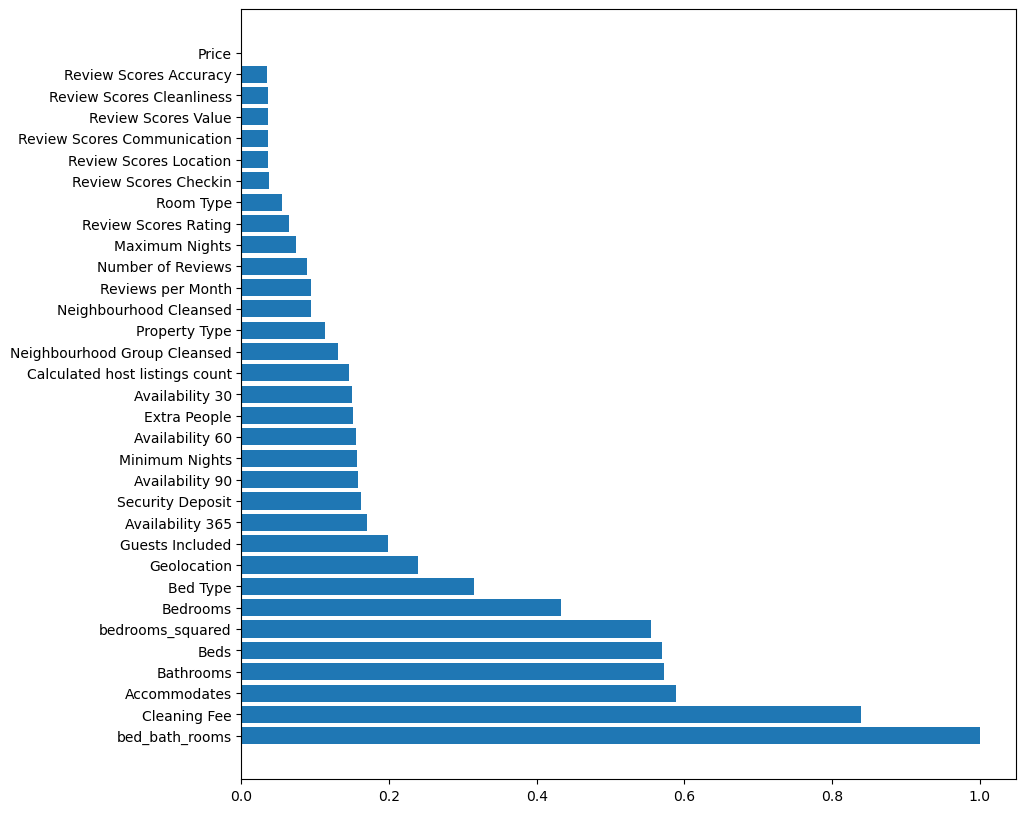

In [663]:
#Graficamos importancia de las variables

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [659]:
#Probamos el modelo con Boosted_Trees

from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1, 0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.9s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.8s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.7s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.7s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.5s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.6s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.9s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  26.8s
[CV] END ...............learning_rate=0.1, n_esti

In [660]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)
print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))


Train:  0.8152744064523695
Test:  0.6441176395511531


In [ ]:
#CONCLUSIONES

#Vemos que las prestaciones de los modelos no son óptimas, más si decentes. Seguramente habría que seguir 
#investigando para mejorar el modelo. De los tres modelos el mejor parece ser el creado con Boosting
# pues la diferencia entre train y test es menor, con una precisión media.
#Hemos probado diferentes métodos de selección de características para encontrar las mejores variables y al final
#nos hemos quedado con aquellas que de momento han dado los mejores resultados.

